Nirit Trabelsi 207781220

Adi Regev 208884536 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import os,sys
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


# **Get data**

In [ ]:
# Get data Nirit

from google.colab import drive
drive.mount('/content/gdrive')
path = 'gdrive/MyDrive/Colab/Mini project/diabetes.csv' # Nirit
df = pd.read_csv(path) # Load from file on the drive
df = shuffle(df) # To mix the data
X = df.drop("Outcome",axis=1) # Data Frame
Y=df["Outcome"]

In [ ]:
# Get data Adi

# from google.colab import drive
# drive.mount('/content/gdrive')
# path = 'gdrive/MyDrive/MyMini/diabetes.csv' # Adi
# df = pd.read_csv(path) # load from file on the drive
# df = shuffle(df) # To mix the data
# X = df.drop("Outcome",axis=1) # Data Frame
# Y=df["Outcome"]


# **VISUALIZATION**

In [ ]:
# Histogram of all fitures in the data
f,axs = plt.subplots(1,len(df.columns),figsize=(25,5))
h=0
for col in df.columns:
       axs[h].hist(df[col], bins=40,label=col) 
       axs[h].set_title(col) 
       h=h+1

# numeric parameters of the data
print("\n",df.describe().to_string(),"\n")

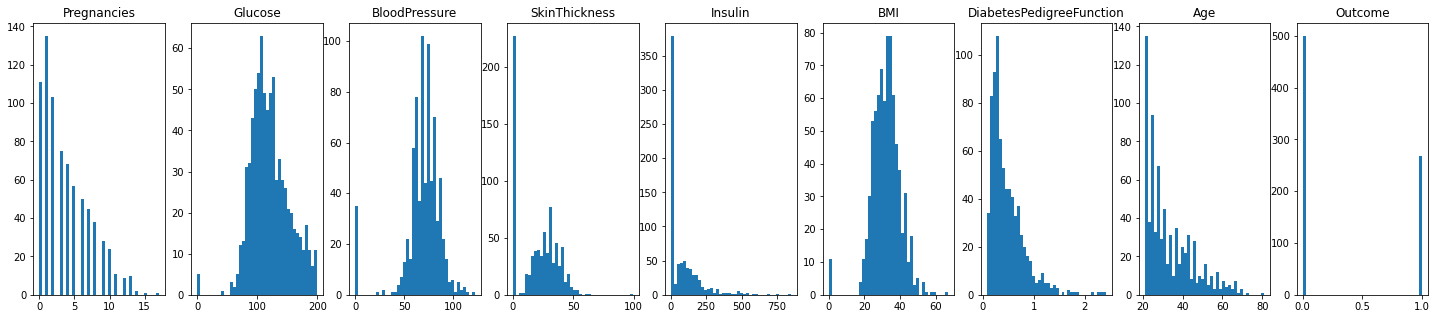

בהדפסה זו ניתן לראות את התפלגות הנתונים עבור כל מאפיין

ניתן לראות שבחלק מהמאפיינים יש ערכים אפסים, שהם לא הגיוניים. הנחנו שמדובר במידע חסר לכן בהמשך נמיר ערכים אלו לממוצע או לחציון






---



#Remove zeros to None in the fitures Glucose, BloodPressure, SkinThickness, Insulin and BMI because it is look like they put zeros instead of Nones. 
Later we changed None values to mean or median.

In [ ]:
f, axs = plt.subplots(1, len(X.columns),figsize=(25,5))
h=0
for col in X.columns:
    if h>0 and h<=5:
        X[col][X[col]==0]=None # Change zeros to None
    axs[h].hist(X[col],  bins=40,label=col) 
    axs[h].set_title(col) 
    h=h+1
print("\n",df.describe().to_string(),"\n")
print("\n",X.describe().to_string(),"\n")


Before

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
    count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
    mean      3.845052  120.894531      69.105469      20.536458   79.799479   31.992578                  0.471876   33.240885    0.348958
    std       3.369578   31.972618      19.355807      15.952218  115.244002    7.884160                  0.331329   11.760232    0.476951
    min       0.000000    0.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000    0.000000
    25%       1.000000   99.000000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000    0.000000
    50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000    0.000000
    75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000    1.000000
    max      17.000000  199.000000     122.000000      99.000000  846.000000   67.100000                  2.420000   81.000000    1.000000 

After

              Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age

    count   768.000000  763.000000     733.000000     541.000000  394.000000  757.000000                768.000000  768.000000
    mean      3.845052  121.686763      72.405184      29.153420  155.548223   32.457464                  0.471876   33.240885
    std       3.369578   30.535641      12.382158      10.476982  118.775855    6.924988                  0.331329   11.760232
    min       0.000000   44.000000      24.000000       7.000000   14.000000   18.200000                  0.078000   21.000000
    25%       1.000000   99.000000      64.000000      22.000000   76.250000   27.500000                  0.243750   24.000000
    50%       3.000000  117.000000      72.000000      29.000000  125.000000   32.300000                  0.372500   29.000000
    75%       6.000000  141.000000      80.000000      36.000000  190.000000   36.600000                  0.626250   41.000000
    max      17.000000  199.000000     122.000000      99.000000  846.000000   67.100000                  2.420000   81.000000 


##ניתן לראות את ההבדל בין הנתונים לפני הורדת האפסים ובין הנתונים לאחר ההורדה
## שמתבטא בכך שיש הטיה בממוצעים של המאפיינים עם האפסים

 הוספנו היסטוגרמה לאחר הורדת האפסים להתרשמות

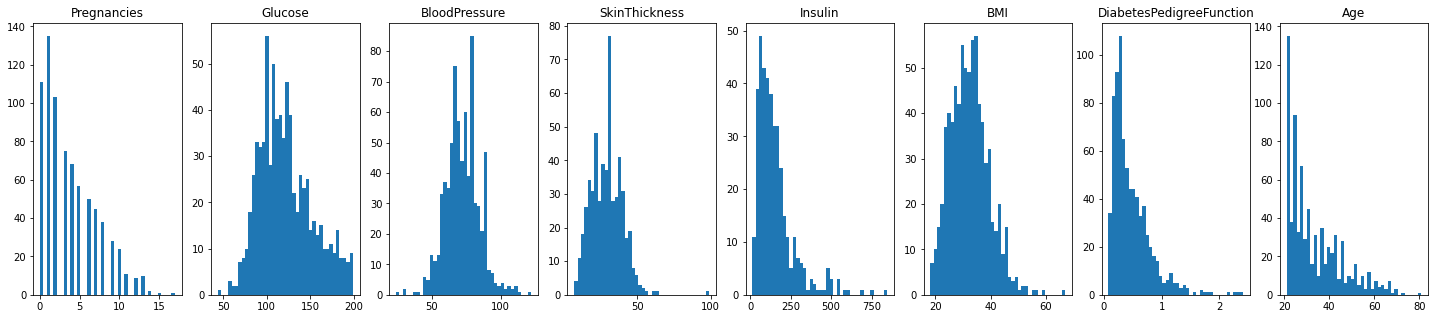

# Histograms of the fitures according to sick and healthy


In [ ]:
# Histograms of the fitures according to seaks and healtys

f, axs = plt.subplots(1, len(X.columns),figsize=(30,10))
h=0
for col in X.columns:
    b=X.copy()
    b["val"]=Y
    sns.histplot(b,x=col,hue="val",bins=40,label=col,ax=axs[h]) 
    axs[h].set_title(col) 
    h=h+1


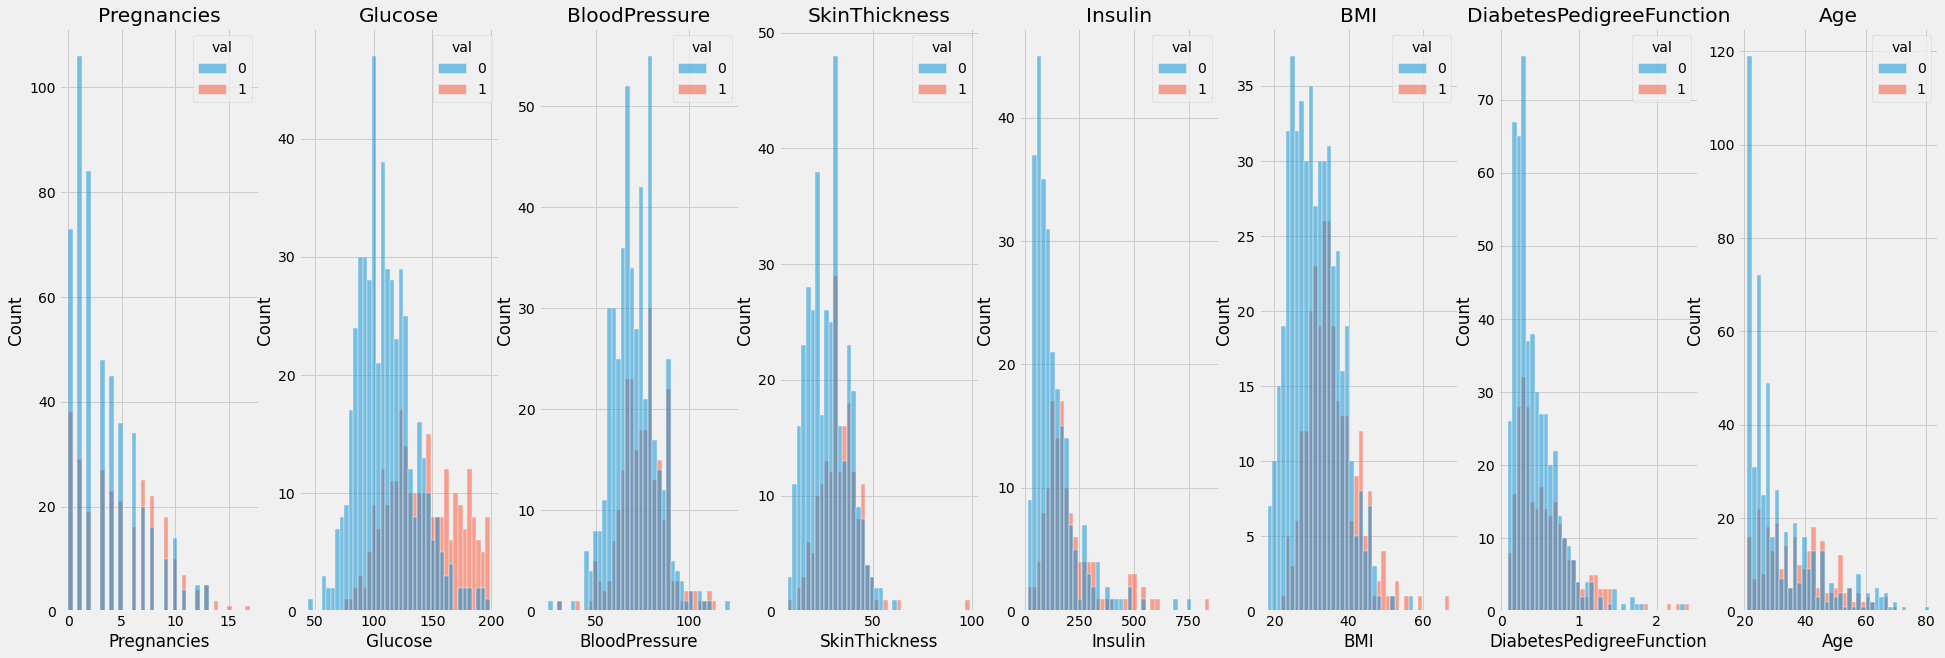

#ניתן לראות הבדלים במאפיינים לפי חולים ובריאים
### חולים: 1
###בריאים: 0
#ניתן לראות שהתפלגות הבריאים מתפרסת יותר מאשר התפלגות החולים(מתפרסת מבחינת ערכים). 
#ישנם שני מאפיינים שניתן לראות בם הבדל בין בריאים וחולים אך לא באופן חד משמעי(יש אזורים שהם חופפים בין בריאים לחולים):
##אינסולין וגלוקוז
#ואלו מאפיינים שידועים כקשורים באופן ישיר למחלת הסכרת


(גלוקוז-רמת הסוכר בדם. אינוסלין-תפקידו להכניס את הסוכר לתאים)
ברוב המקרים ניתן לראות בגרפים שלחולים יש רמת גלוקוז גבוהה יותר 
אך לגבי אינסולין לא ברור לנו לגמרי למה רמתו בדם גבוהה יותר אצל חולים,

אנו משערות שהסיבה לכך היא שבסכרת מסוג 2 התאים פחות רגישים לאינסולין
ולכן אף על פי שיש בדם גם גלוקוז וגם אינסולין, התאים לא קולטים אותו כנדרש

חשוב לציין שהגרפים כאן עם ערכים חסרים


# Data analyzed and normalization
## Split the data to train and test

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Split the data to train and test (70%-30%)
# Stratify keeps the ratio between healty and sicks as the original data. 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.30,random_state=0) # The results are NOT a data frame, but np.array


###################   
imputer = SimpleImputer(missing_values=np.nan, strategy='median') # make Nan to median in the data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler() # norm
X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.transform(X_test)

# johnson without norm
yj = PowerTransformer(method='yeo-johnson')#Gaussian or more-Gaussian-like probability distribution
X_train_yj = yj.fit_transform(X_train)
X_test_yj = yj.transform(X_test)

# johnson with norm
yj = PowerTransformer(method='yeo-johnson')#Gaussian or more-Gaussian-like probability distribution
X_train_yj_N = yj.fit_transform(X_train_norm)
X_test_yj_N = yj.transform(X_test_norm )


#   הורדנו את ערכי NANה

יצרנו 4 סוגי נתונים:

 אחד רגיל ללא נירמול

שני עם נירמול

 johnson שלישי בלי נירמול אבל עם 
 
  ורביעי ג'ונסון עם נירמול

 ## המטרה של 4 סוגי נתונים שונים היא למצוא את סוג הדתא והנרמול שאיתו הכי כדאי לעבוד ליצירת רשת נוירונים ולמידת מכונה בכללי

# A function to make histograma for the different data



In [ ]:
def hist_todf(df,name="data"):
    f, axs = plt.subplots(1,len(X.columns),figsize=(25,5))
    f.suptitle(name,fontsize=20)
    h=0
    for col in range(len(df[0])):
       axs[h].hist(df.T[col],  bins=40)
       axs[h].set_title(X.columns[col]) 
       h=h+1

In [ ]:
# Histogram of all types of data
hist_todf(X_test,"X_test")
hist_todf(X_train,"X_train")

hist_todf(X_train_yj,"X_train_yj")
hist_todf(X_test_yj,"X_test_yj")

hist_todf(X_train_norm,"X_train_norm")
hist_todf(X_test_norm,"X_test_norm")

hist_todf(X_train_yj_N,"X_train_yj_N")
hist_todf(X_test_yj_N,"X_test_yj_N")

###4 histograms of different test data




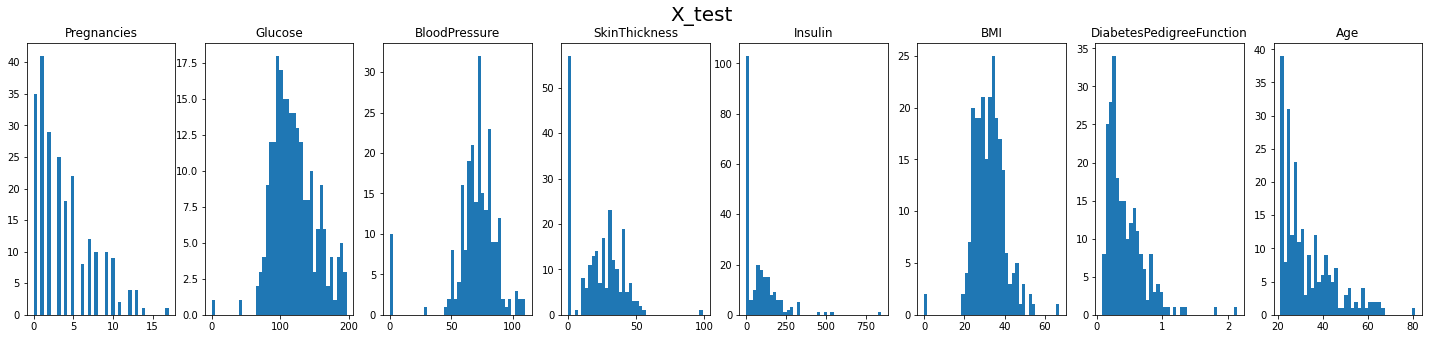






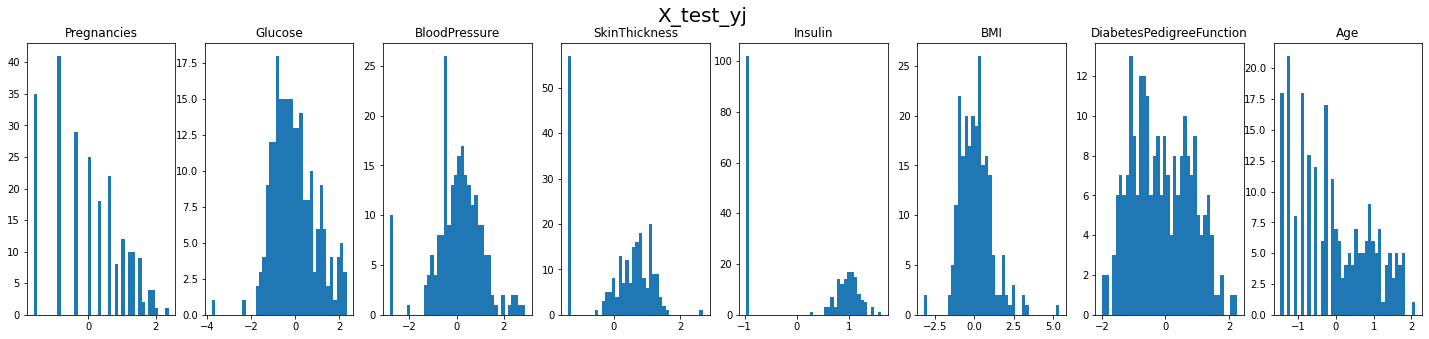

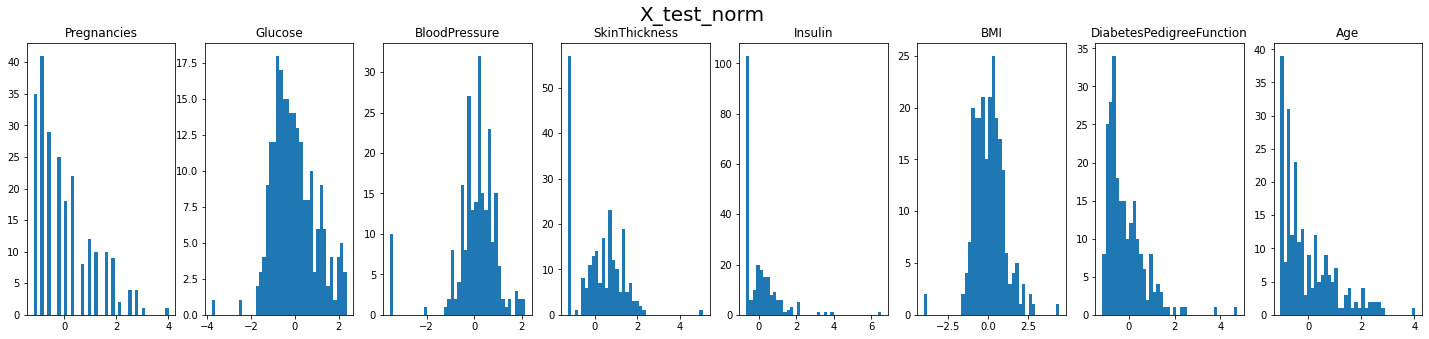

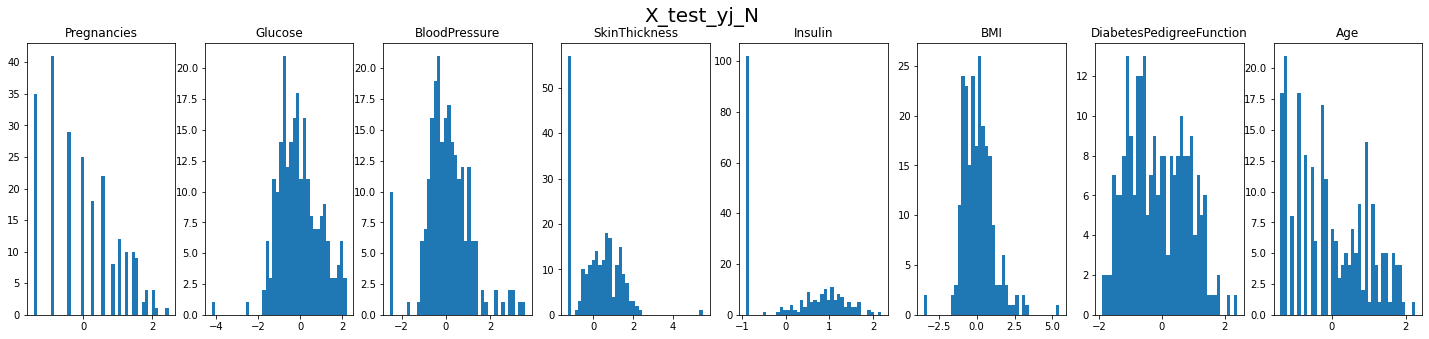

###4 histograms of different train data


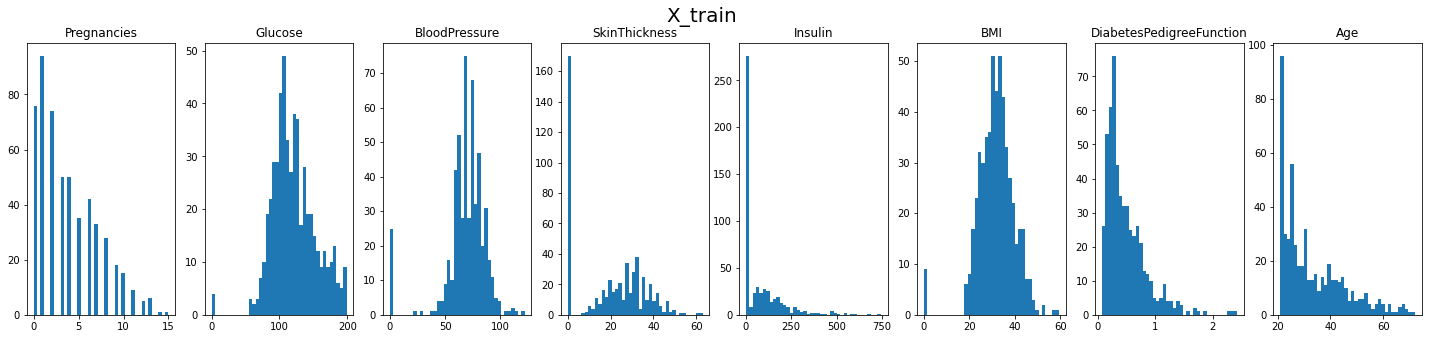

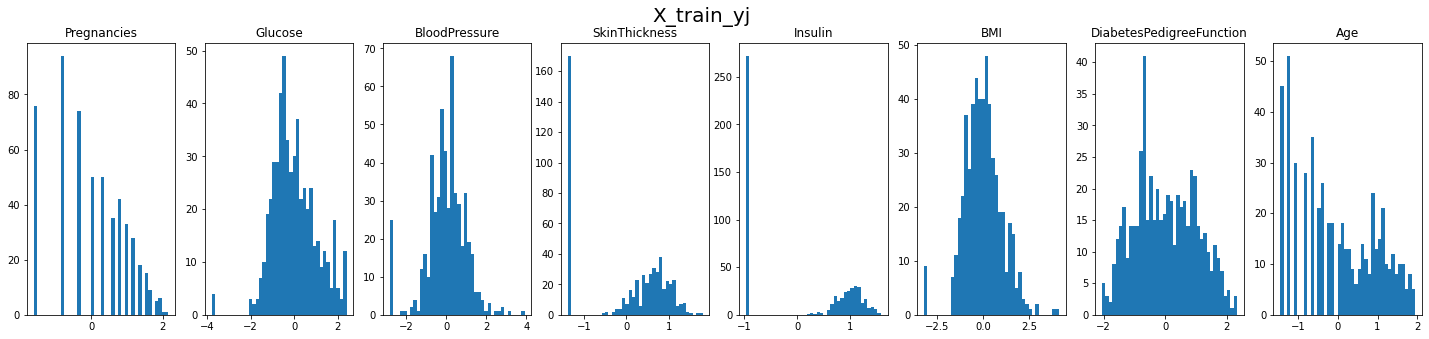

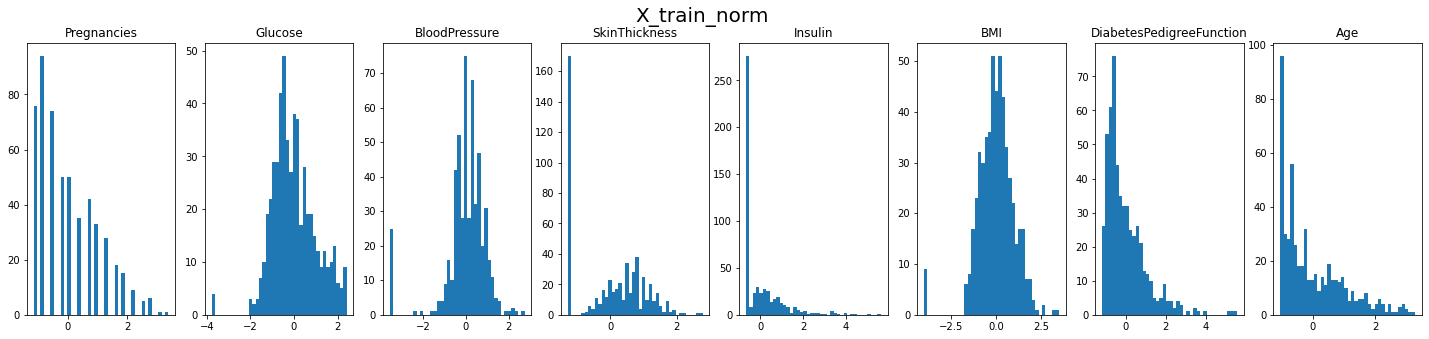

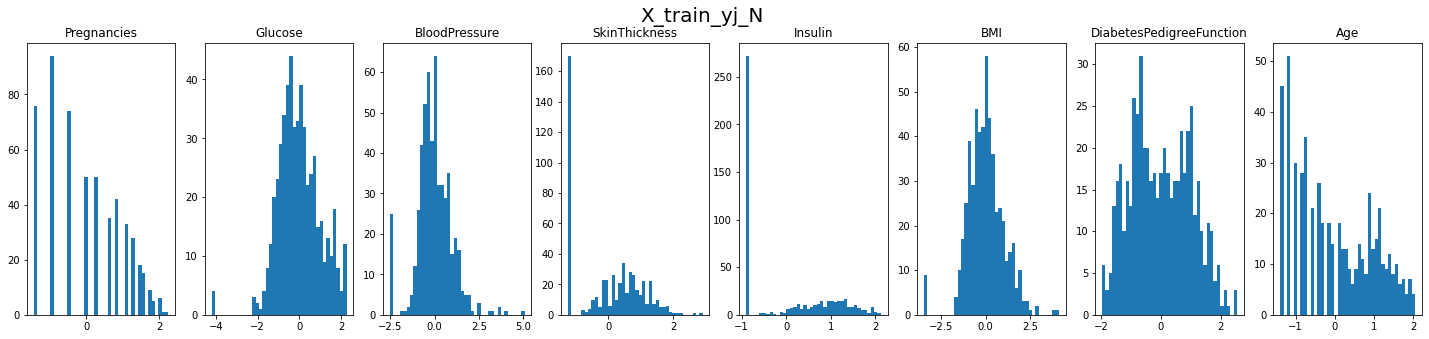

#Finding the K best features for the data

In [ ]:
# In real time we changed K to be 8, 5 , 4,  3 and 2 -so we can see the difference between PCA plots 

names={} #  in names we put the columns of the K best function
# we used "names" later to find if the data have less then 8 features

k=5 # we changed by hand
select = SelectKBest(f_classif, k=k) # t-test to chose the k best parameters

# for norm
X_train_f = select.fit_transform(X_train_norm, Y_train)
X_test_f = select.transform(X_test_norm)
names["simpN5"]=X.columns[select.get_support(indices=True)] # get the columns names of k best

# for norm and johnson
X_train__yj_N5 = select.fit_transform(X_train_yj_N, Y_train)
X_test__yj_N5 = select.transform(X_test_yj_N)
names["ygN5"]=X.columns[select.get_support(indices=True)] # get the columns names of k best

# for johnson
X_train__yj5 = select.fit_transform(X_train_yj, Y_train)
X_test__yj5 = select.transform(X_test_yj)
names["yg5"]=X.columns[select.get_support(indices=True)] # get the columns names of k best



In [ ]:
# Here we put all data together
K={"simpN":[X_train,X_test],"nurm":[X_train_norm,X_test_norm],
   "ygN":[X_train_yj_N,X_test_yj_N],"yg":[X_train_yj ,X_test_yj],
   "simpN5":[X_train_f,X_test_f],"ygN5":[X_train__yj_N5,X_test__yj_N5],
   "yg5":[X_train__yj5 ,X_test__yj5]}



# Preparation all types of data for visualization

In [ ]:
# Preparation all types of data for visualization

Y=np.append(Y_train,Y_test)

df_dic={} # Here we make all data as DataFrame to make it easier to make visualization with simple functions

for i in K.keys(): # Go through all data in K
  np_X=np.append(K[i][0],K[i][1],axis=0) # Combine test and train

  if i in names: # If the data have less then 8 features
    df=pd.DataFrame(np_X,columns=names[i]) # Get the name of the features that we get from K-best
  else:
    df=pd.DataFrame(np_X,columns=X.columns)
  
  df["outcome"]=Y
  df_dic[i]=df # In df_dic we have dataframes of the different formations of the data

#print(df_dic)

# Visualizations of all types of data


In [ ]:
%matplotlib inline
plt.style.use('fivethirtyeight')
# Plot corellation between features
f, axs = plt.subplots(2, 4,figsize=(40,15))
i=0
j=0
for data in df_dic:
  if j==4:
      j=0
      i=i+1
  sns.heatmap(df_dic[data].corr(), annot=True, ax=axs[i][j]).set_title(data)#corellation
  j=j+1

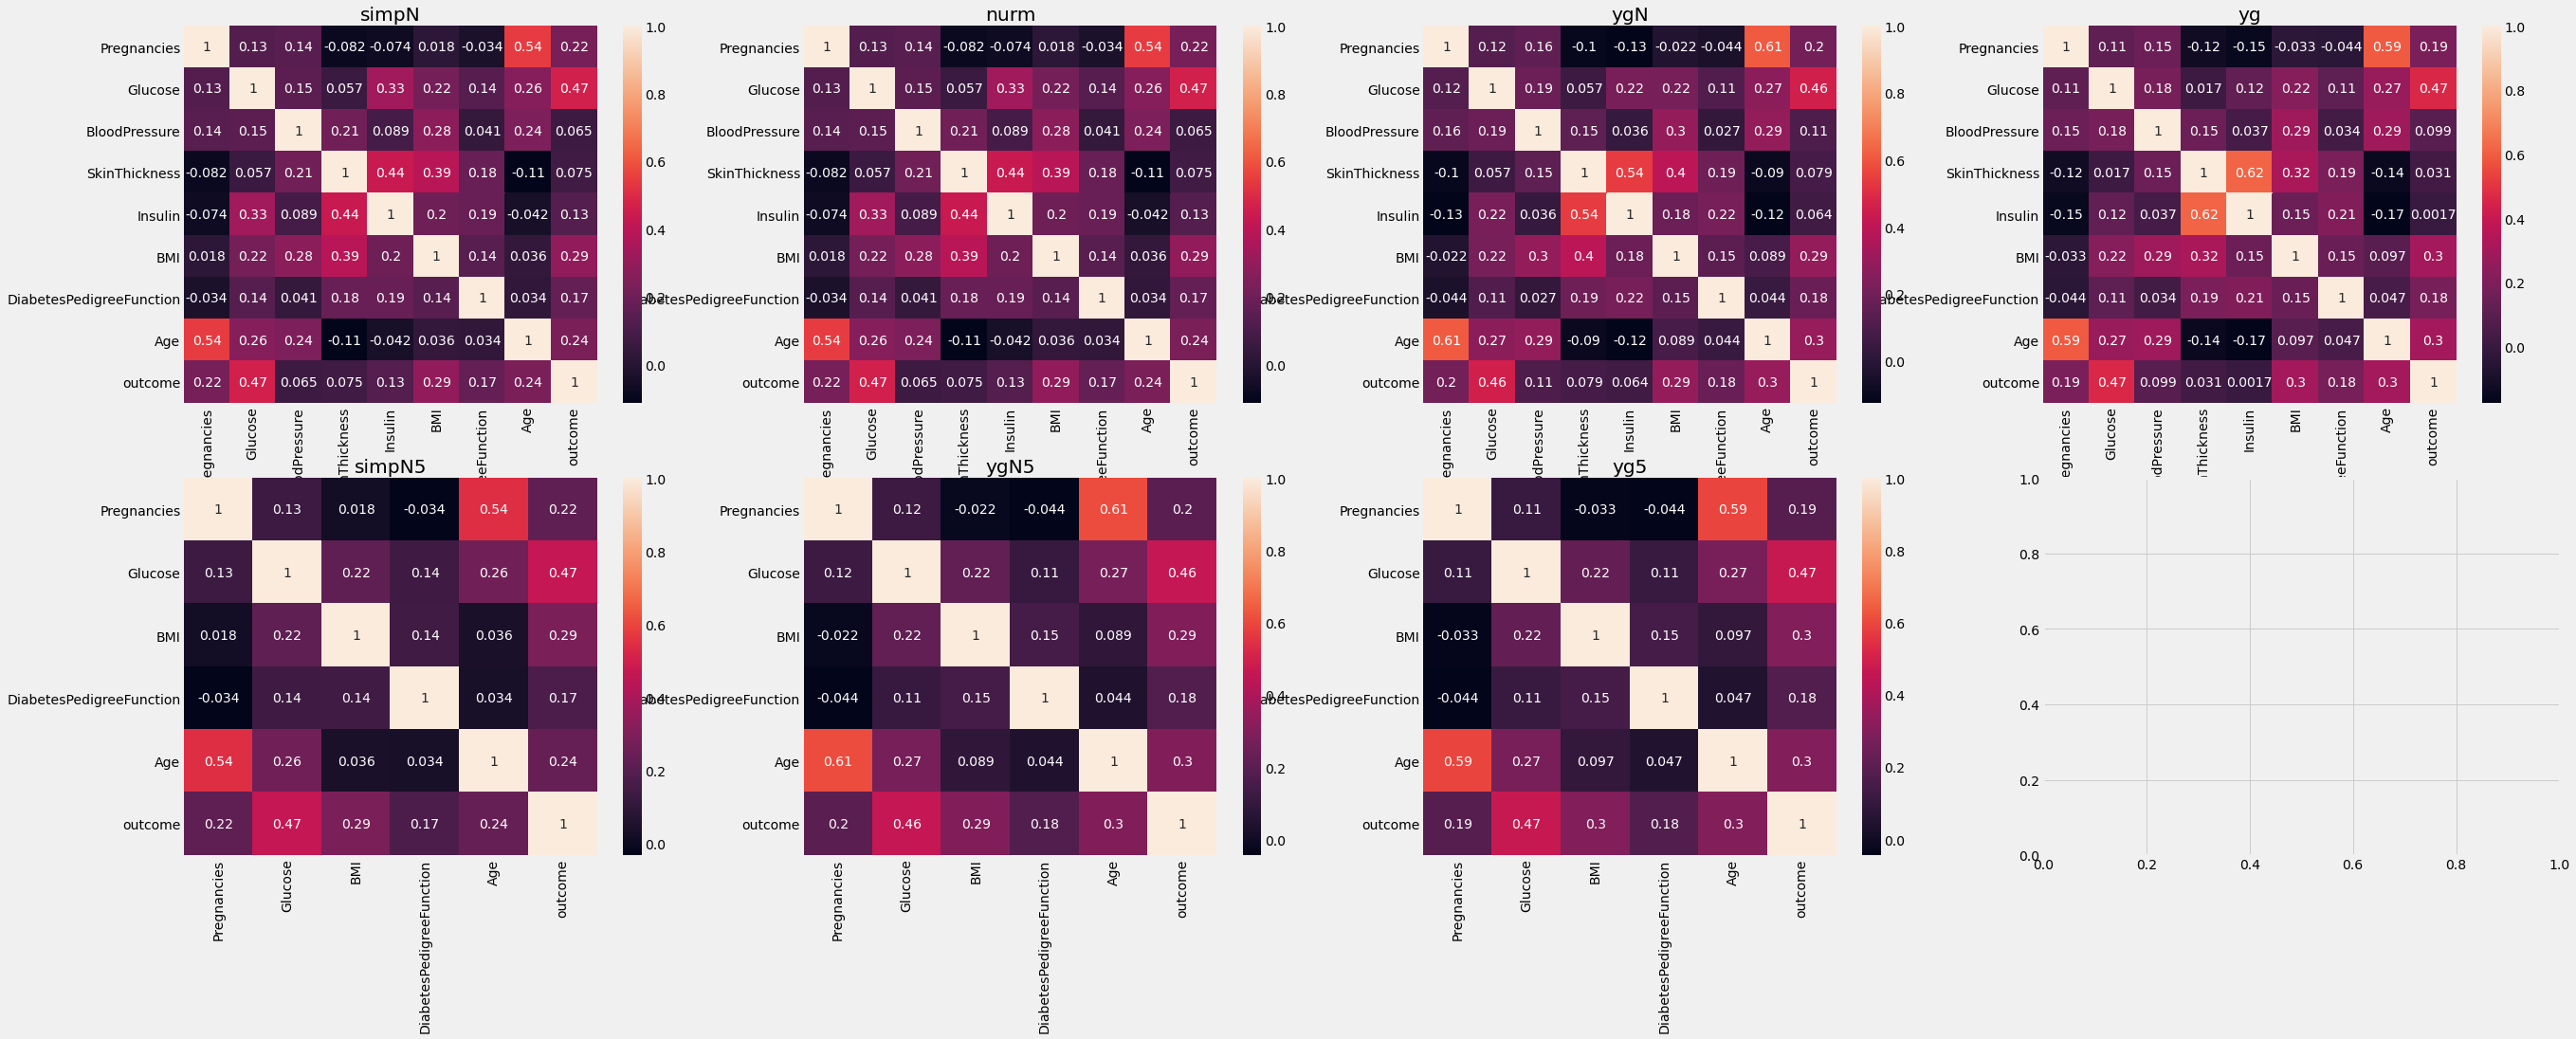

#בגרפים מעל רואים קורלציה בין המאפיינים השונים
##ניתן לראות שאין כל כך הבדל לפני או אחרי נירמול, אבל אחרי שימוש ב
##yeo-johnson
## הקורלציה בין "הריונות" ל-"גיל" עלתה (זאת אומרת שהם מתנהגים באופן דומה יותר אחד לשני)
##והקורלציה בין "עובי עור" ו"אינסולין" עלתה
#חשוב לציין שבגרפים של הבחירה של
#5K
#אין את המאפיין "אינסולין" ולכן לא רואים את הקורלציה הזו

# דבר נוסף חשוב לציין
כשיש פחות מ
5-K best
נלקחו המאפיינים הכי טובים מתוך אותם 5

In [ ]:
# more vizualization:
# 3:

for data in df_dic: # go through all data
  df=df_dic[data]
  j=0
  f, axs = plt.subplots(1,9,figsize=(55,5))
  f.suptitle(data,fontsize=20)
  for col in df.columns:
      sns.histplot(df,x=col,hue="outcome",bins=40,label=col,ax=axs[j]) # make hist for sick and healthy
      axs[j].set_title(col,fontsize=20,color="brown")
      j=j+1
  plt.show()



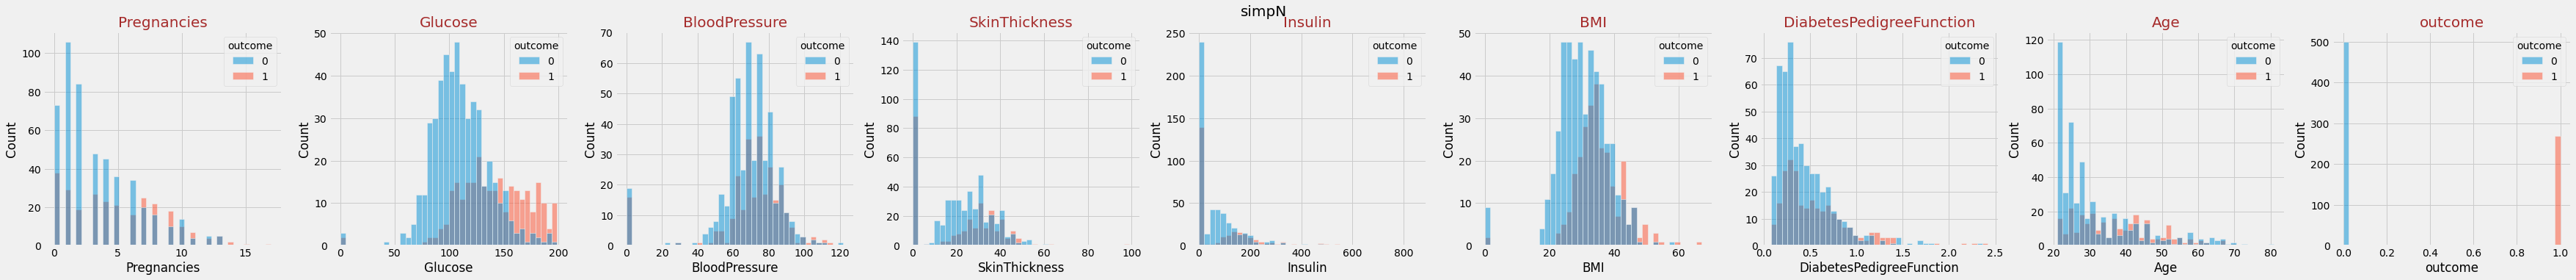

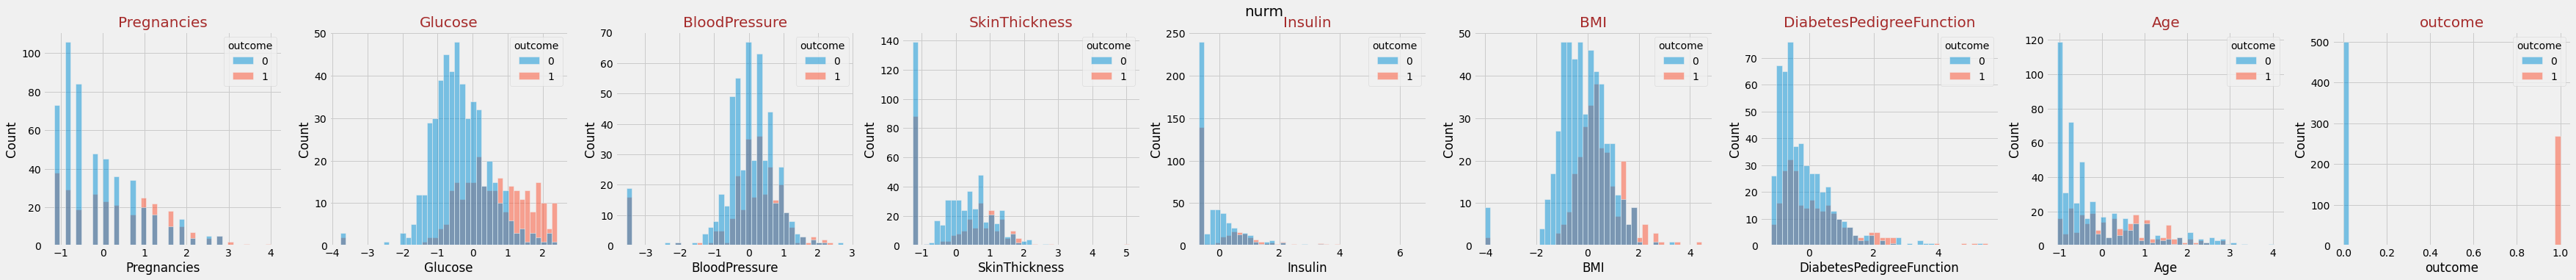

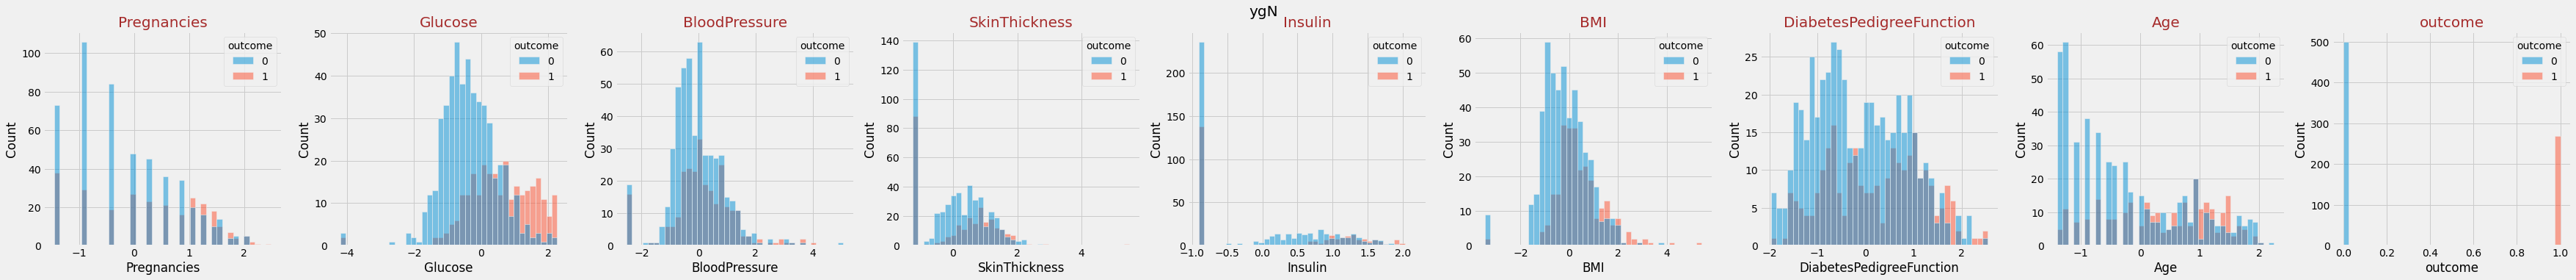

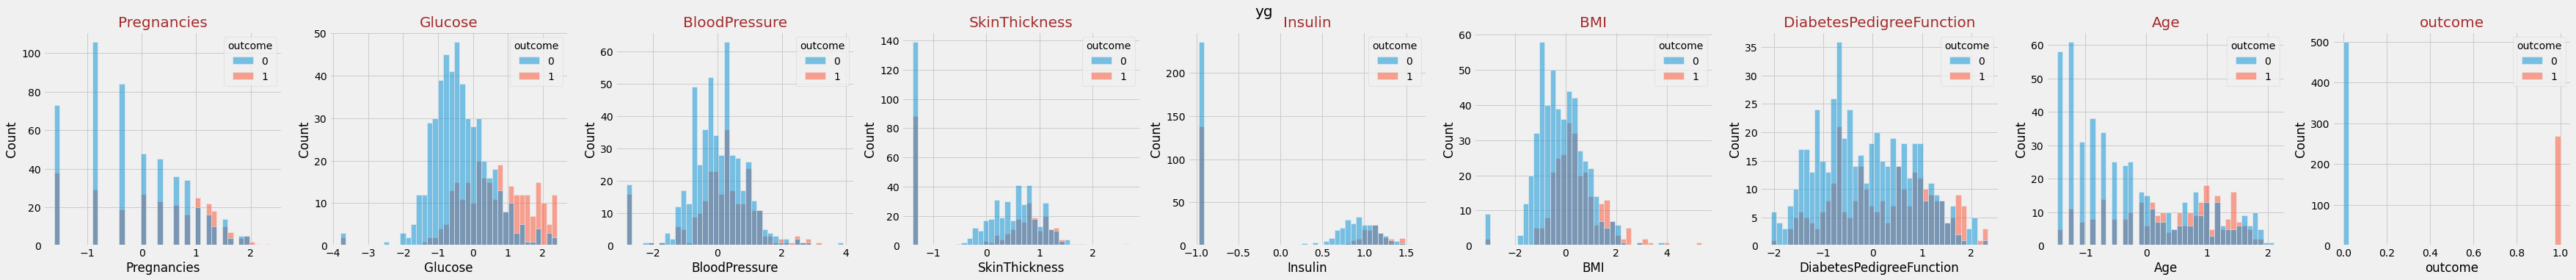

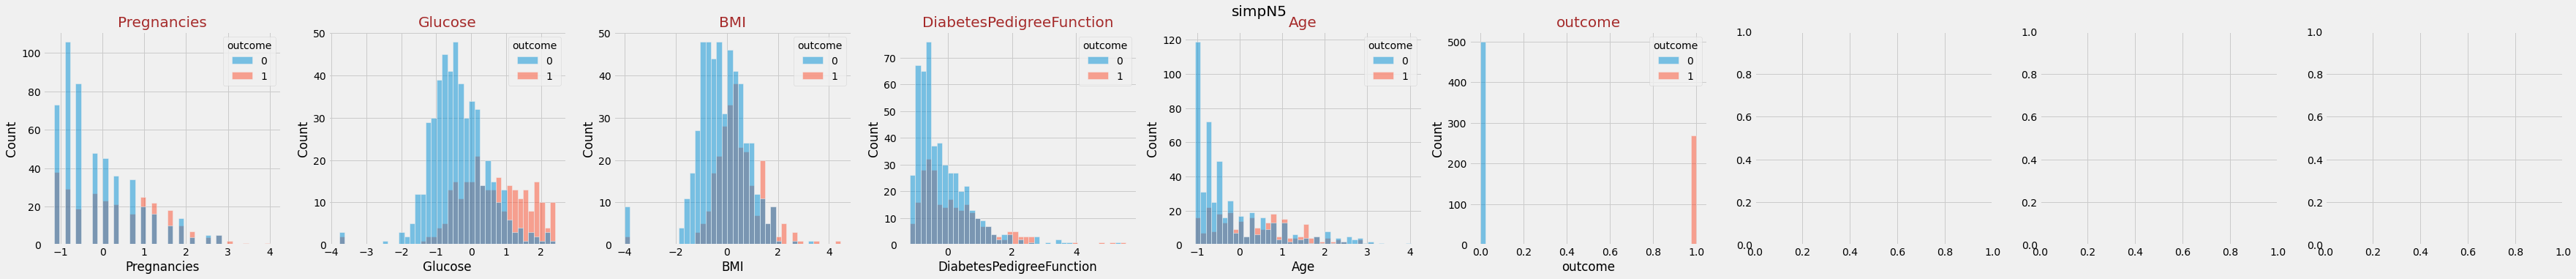

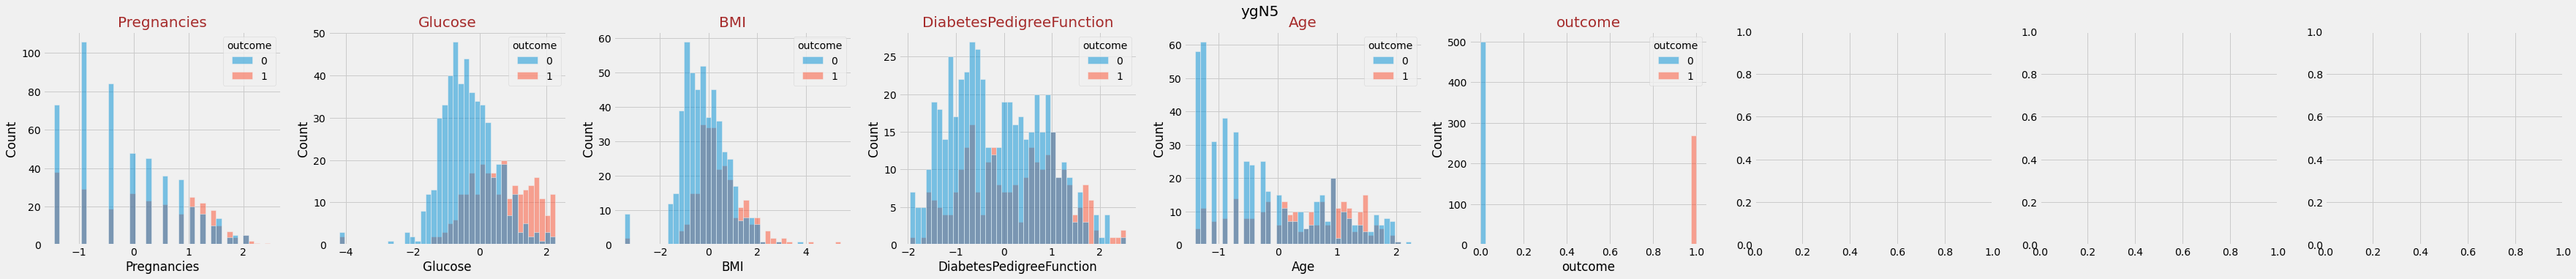

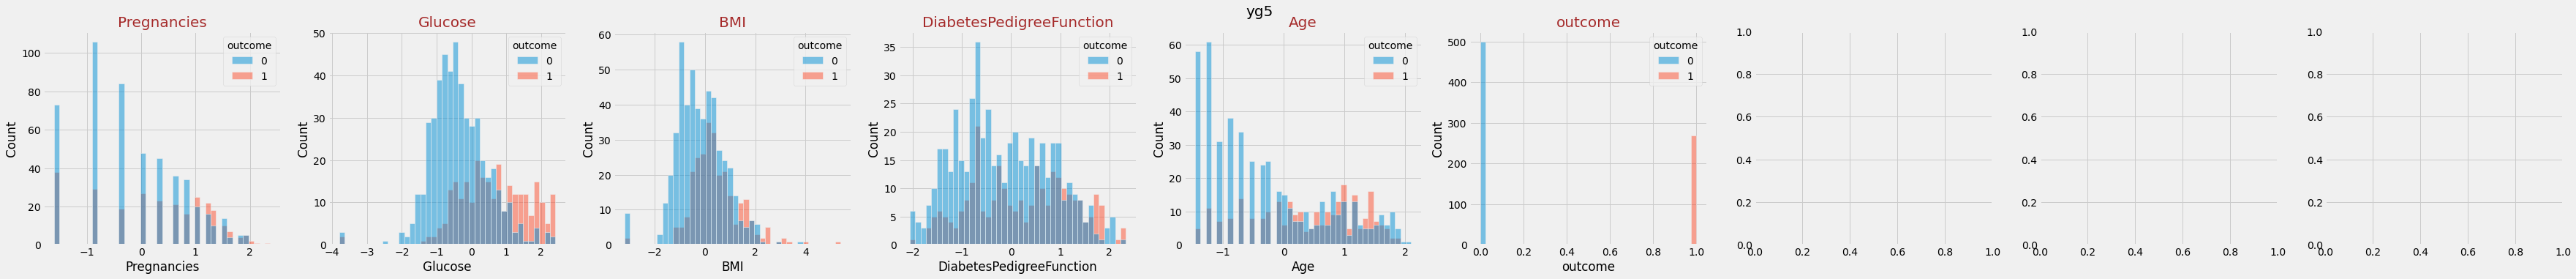

#בגרפים מעל ניתן לראות השוואה בין חולים ובריאים בנתונים השונים(אחרי עיבוד שונה של הנתונים)

#חשוב לציין- כמות הבריאים היא כמעט פי 2 מכמות החולים
 #בהשוואה בין ההסטוגרמות השונות לא ראינו הבדל משמעותי בין הנתונים
# בדתא של gy
# אולי שם ניתן לראות הבדל ברור יותר בין חולים ובריאים בגלוקוז

#לגבי ה BMI-
##אפשר לראות בדתא המקורי(שורות ההיסטוגרמות הראשונה) שאין כל כך  הבדל בהתפלגות של חולה  ובריא 

#אבל
##לאחר נרמול (לא משנה אם זה עם K-BEST או gy(
##אחרי נרמול יש קצת יותר הבדל בהתפלגות של חולה ובריא

# more vizualization:


In [ ]:
#PCA plot
# 4:

f, axs = plt.subplots(7,2,figsize=(18,45))

i=0
for data in df_dic: # go through all data
  df=df_dic[data]
  w=df
  name='outcome'
  n_components=2
  scaler = StandardScaler()
  scaler.fit(w)
  scaled_data = scaler.transform(w)

  pca = PCA(n_components=n_components)# make PCA
  pca.fit(scaled_data)
  x_pca = pca.transform(scaled_data)
  axs[i][0].scatter(x_pca[:,0],x_pca[:,1],c=w[name],cmap='rainbow',) # PCA plot
  axs[i][0].set_title(data)
  map= pd.DataFrame(pca.components_,columns=w.columns)
  sns.heatmap(map,cmap='twilight',ax=axs[i][1]) # heatmap plot
  i=i+1
plt.show()

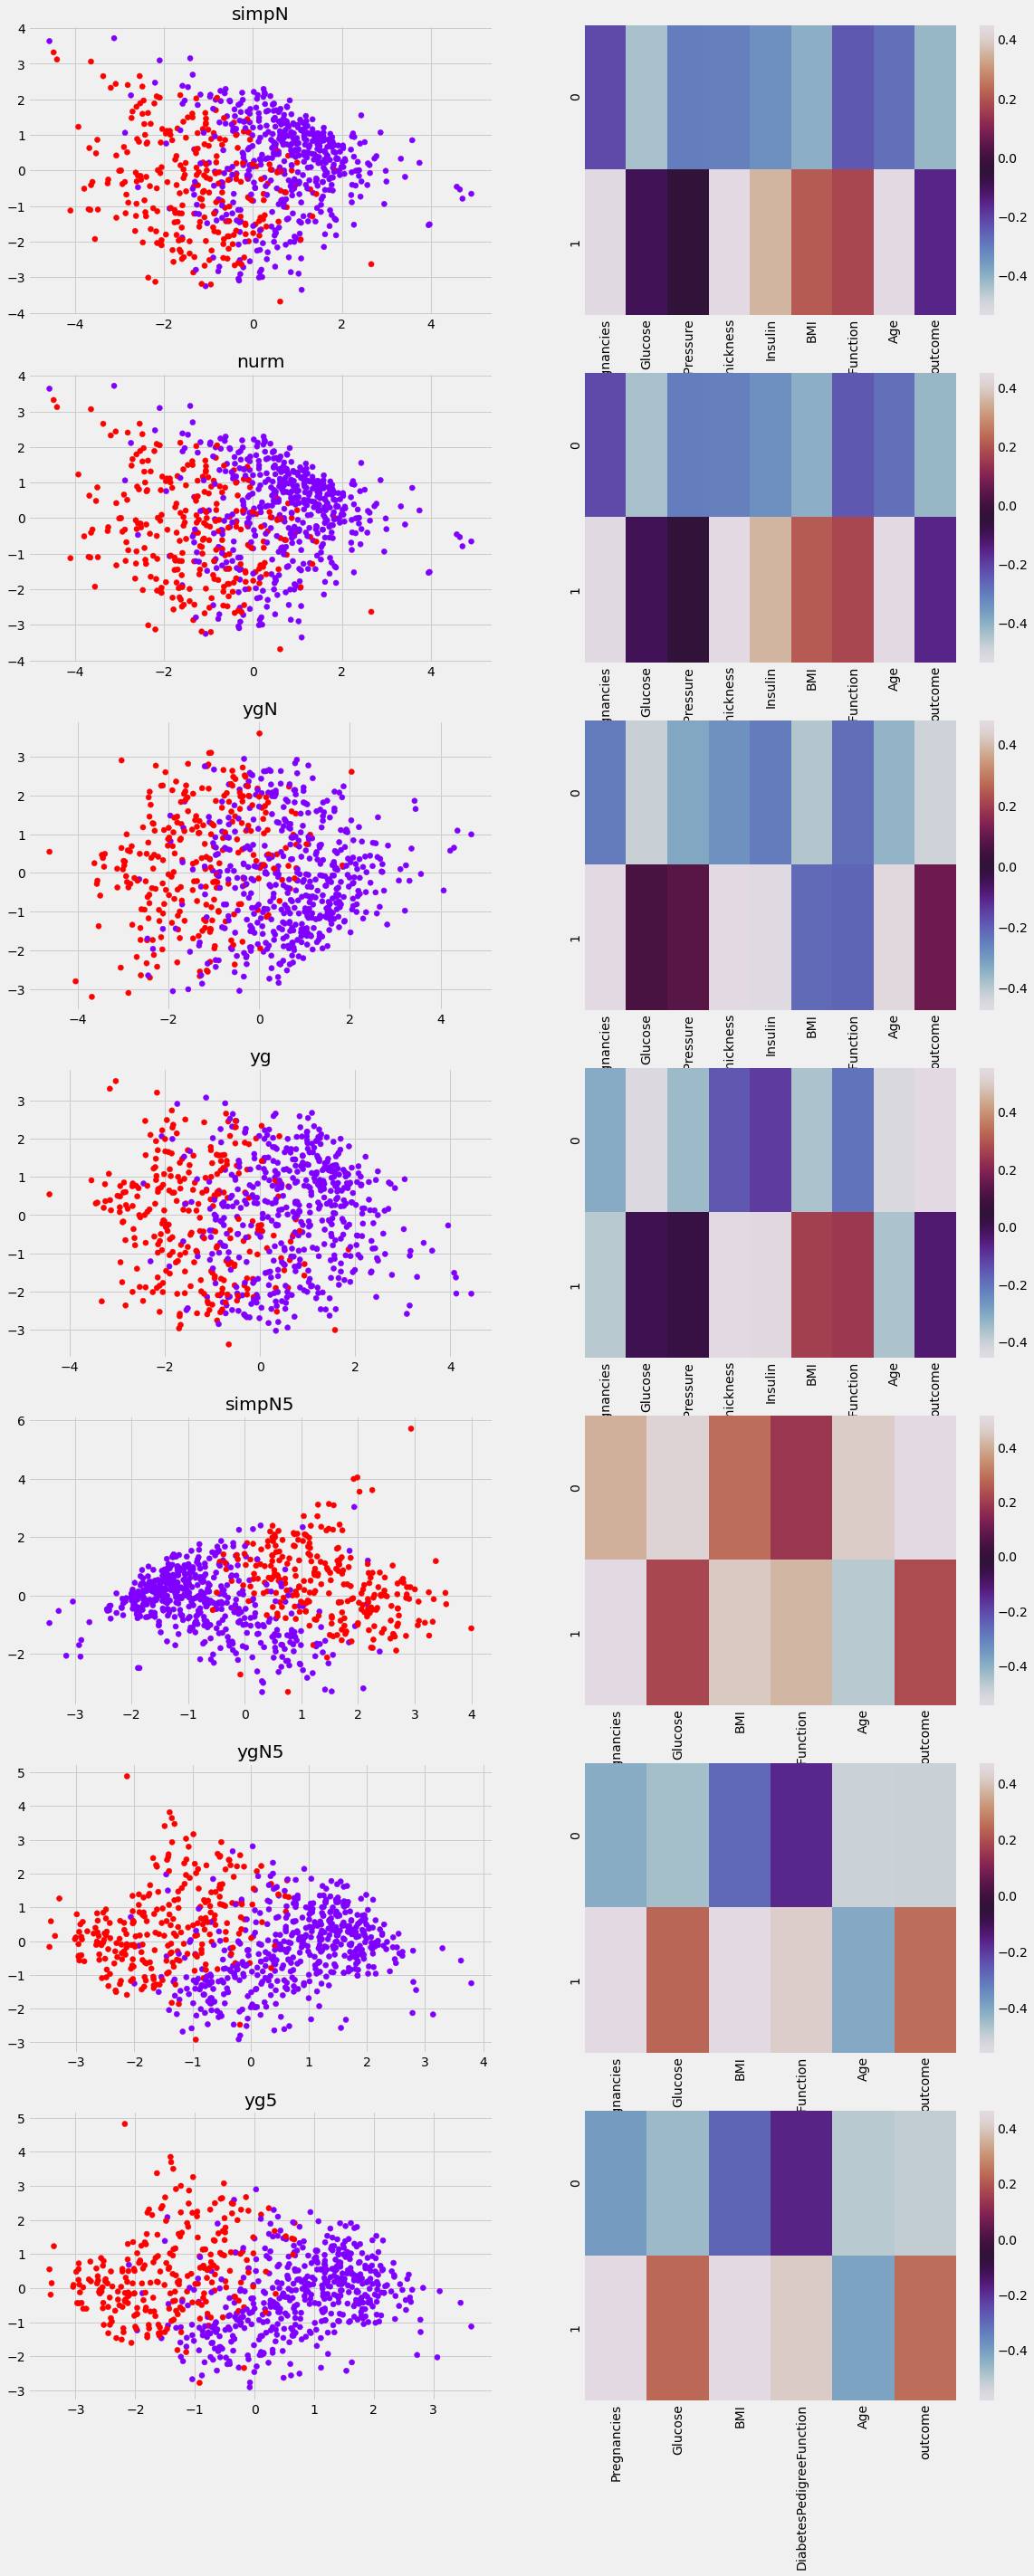

#הגרפים למעלה הם גרפי PCA
#לנתונים השונים(דתא שעובדה באופן שונה)
## אפשר לראות באופן ברור בPCA
#שכאשר לקחנו את 5 המאפיינים הכי טובים ,החלוקה של הגרף לבריאים וחולים התחלקה באופן ברור וטוב יותר מאשר עם כל 8 המאפיינים המקורים




#בגרפים הבאים נעשה השוואה בין 
##KBest 
#שונים
###לא נבחר עדין את מספר המאפיינים הכי טוב ,נצטרך בשביל זה להריץ אלגוריתם למידת מכונה
###אבל זה ייתן לנו כיוון מה לבדוק 

#בהמשך באמת גילינו ש5=K 
#זו האפשרות שנותנת תוצאות הכי טובות לדתא הזה

# k =5
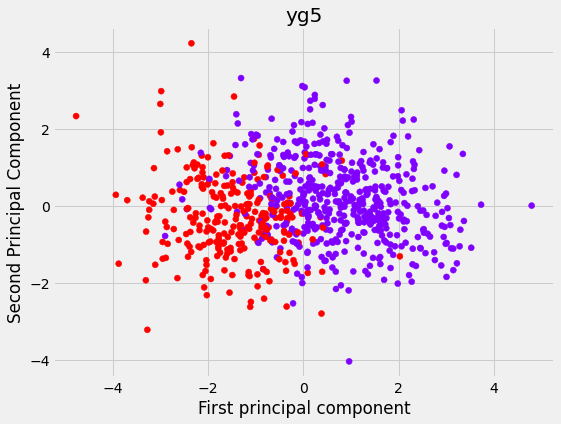




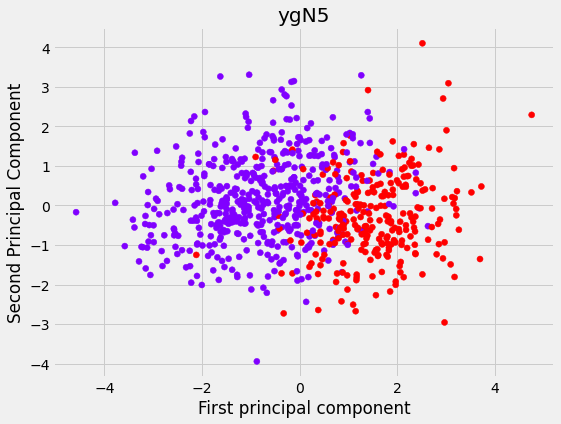



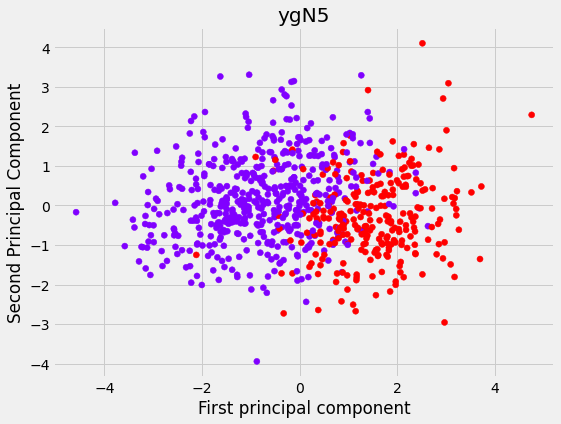

# K=2
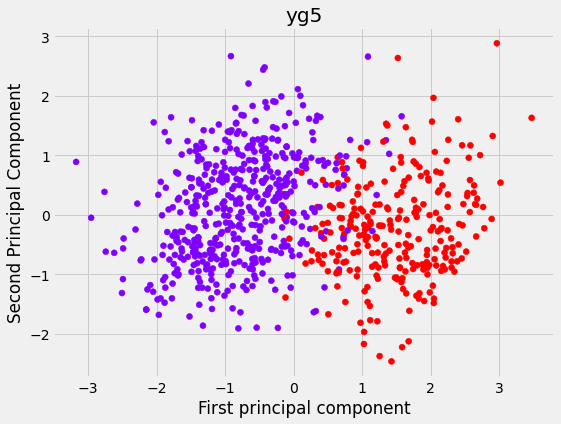






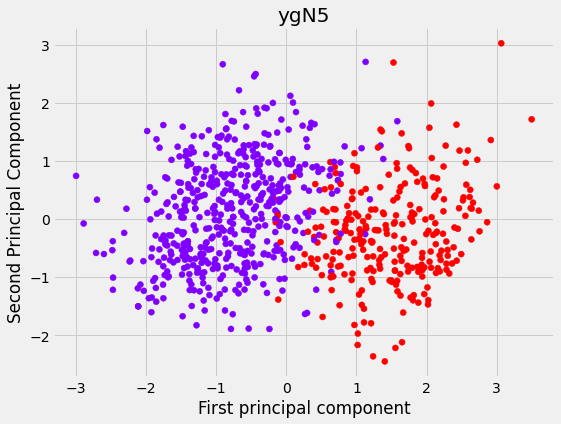






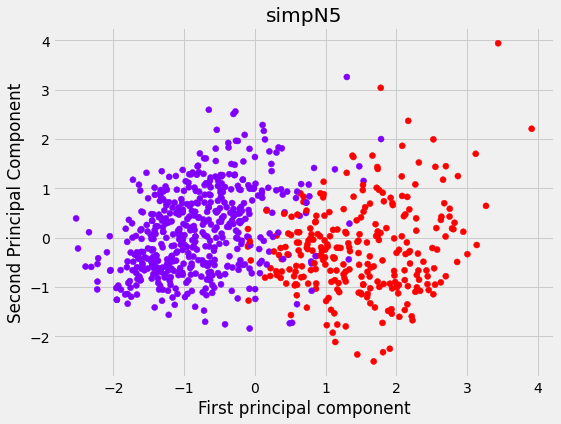







#K=3

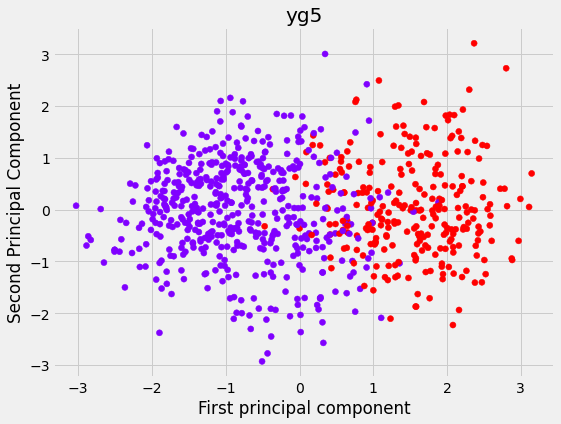




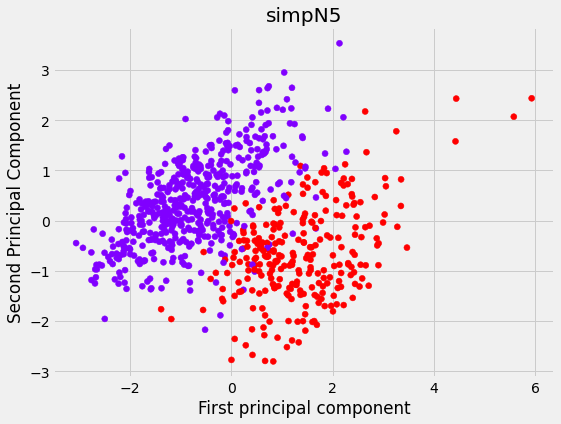


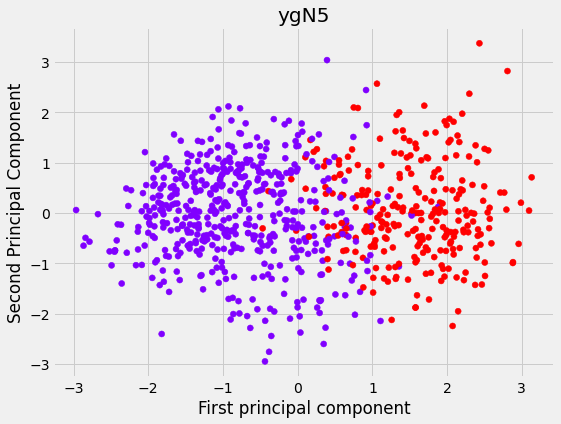

#במבט על הגרפים למעלה אפשר להניח ש
#K=2
# הוא הכי טוב מבחינת חלוקה לחולים ובריאים

#שוב נציין- שלא כך היה בלמידת מכונה ובסוף בחרנו
# 5=K

In [ ]:
#violin plot for all data

for data in df_dic:#go through all data
 f, axs = plt.subplots(1,8,figsize=(40,5))#plot is subplot of 1X8, and size 40X5
 j=0
 if data in names:#get columns names
     g= names[data]
 else:
     g=X.columns#get columns names
 for i in g:#go through columns
  axs[j].set_title(data)
  with sns.axes_style(style=None):
    sns.violinplot("outcome",i, data=df_dic[data],
                   split=True, inner="quartile",
                 palette=["lightblue", "lightpink"],ax=axs[j]);
    j=j+1
plt.show()


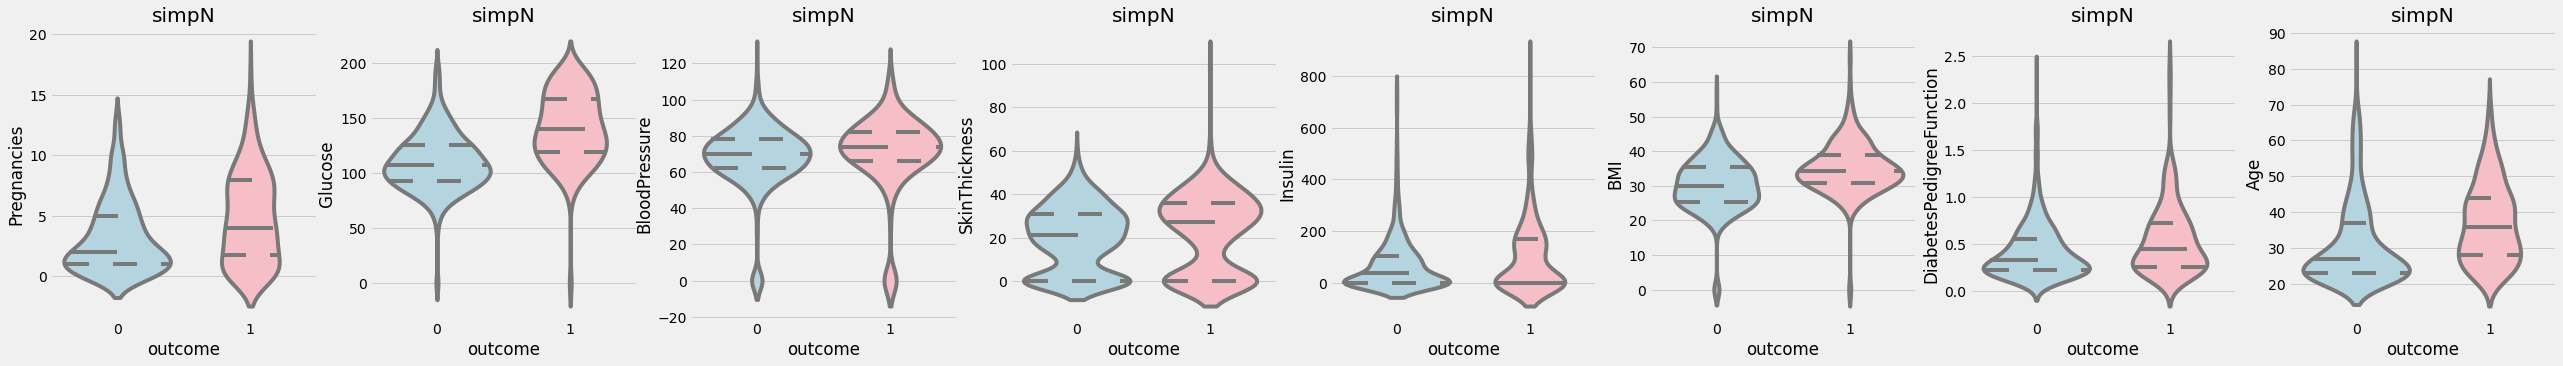

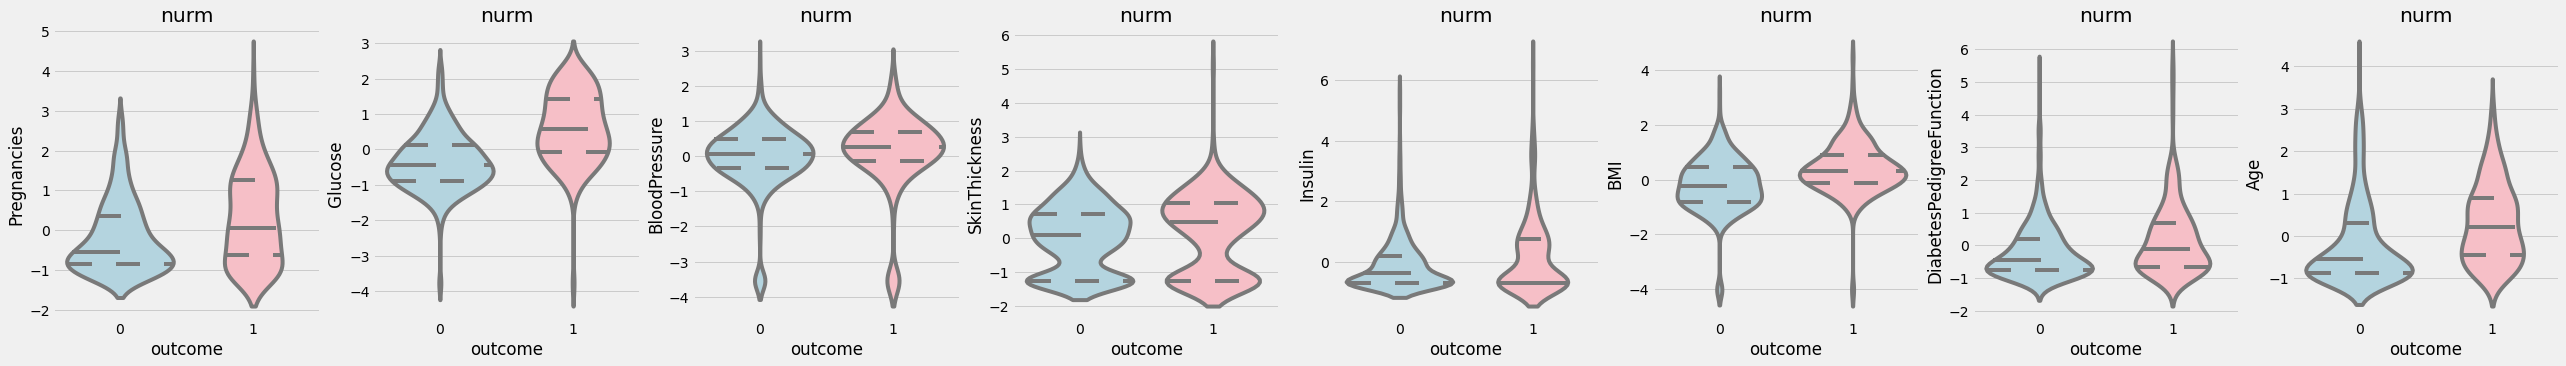

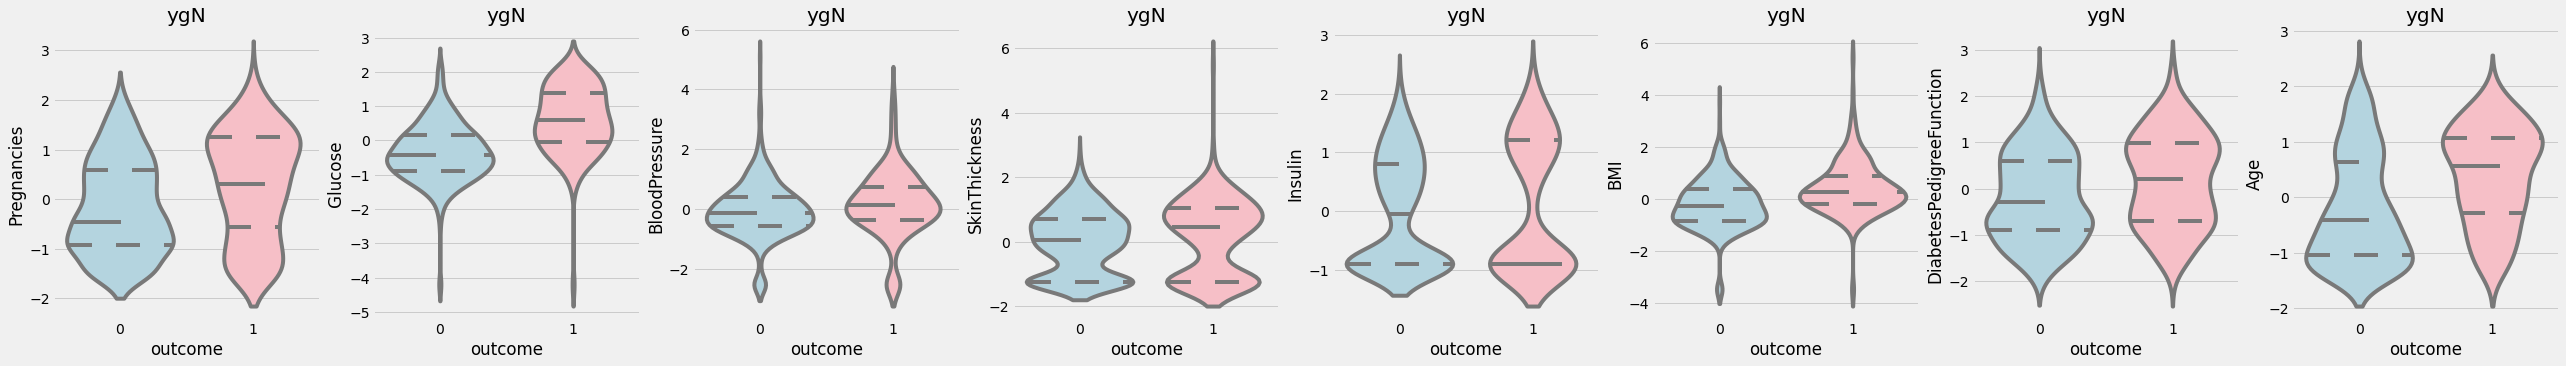

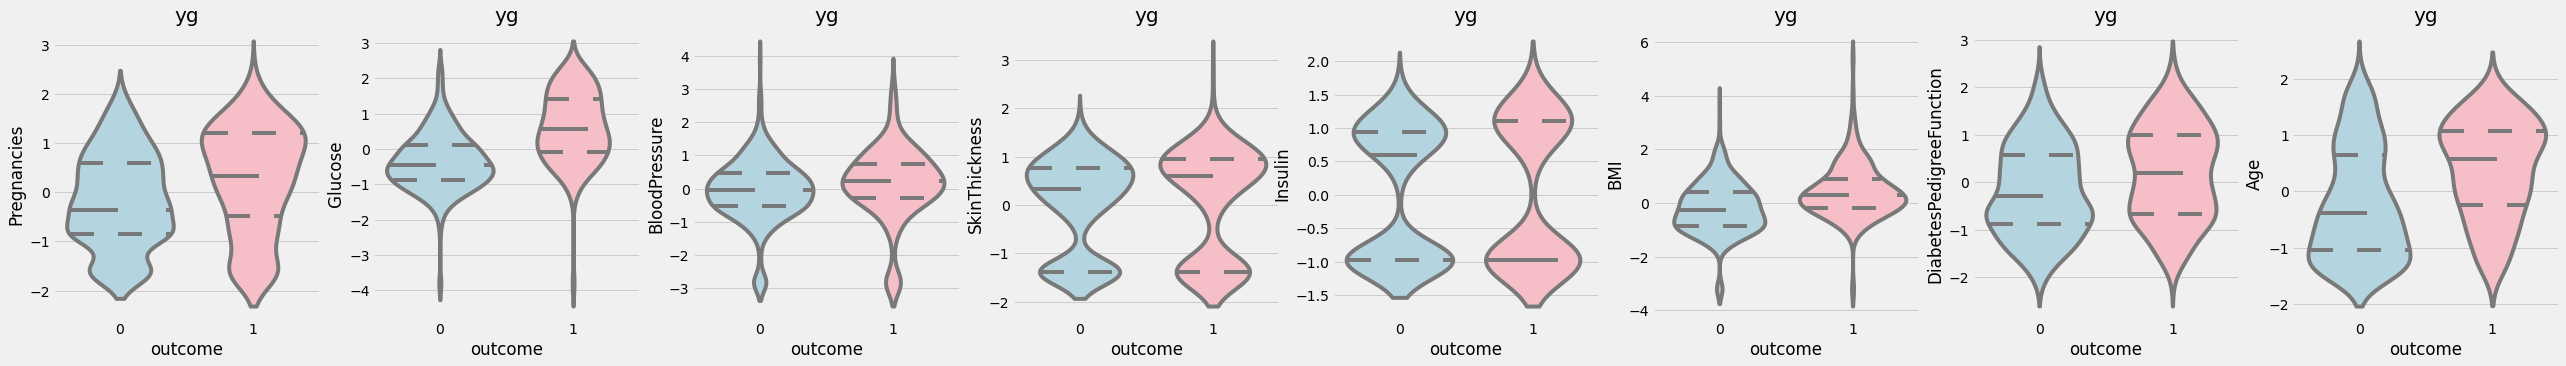

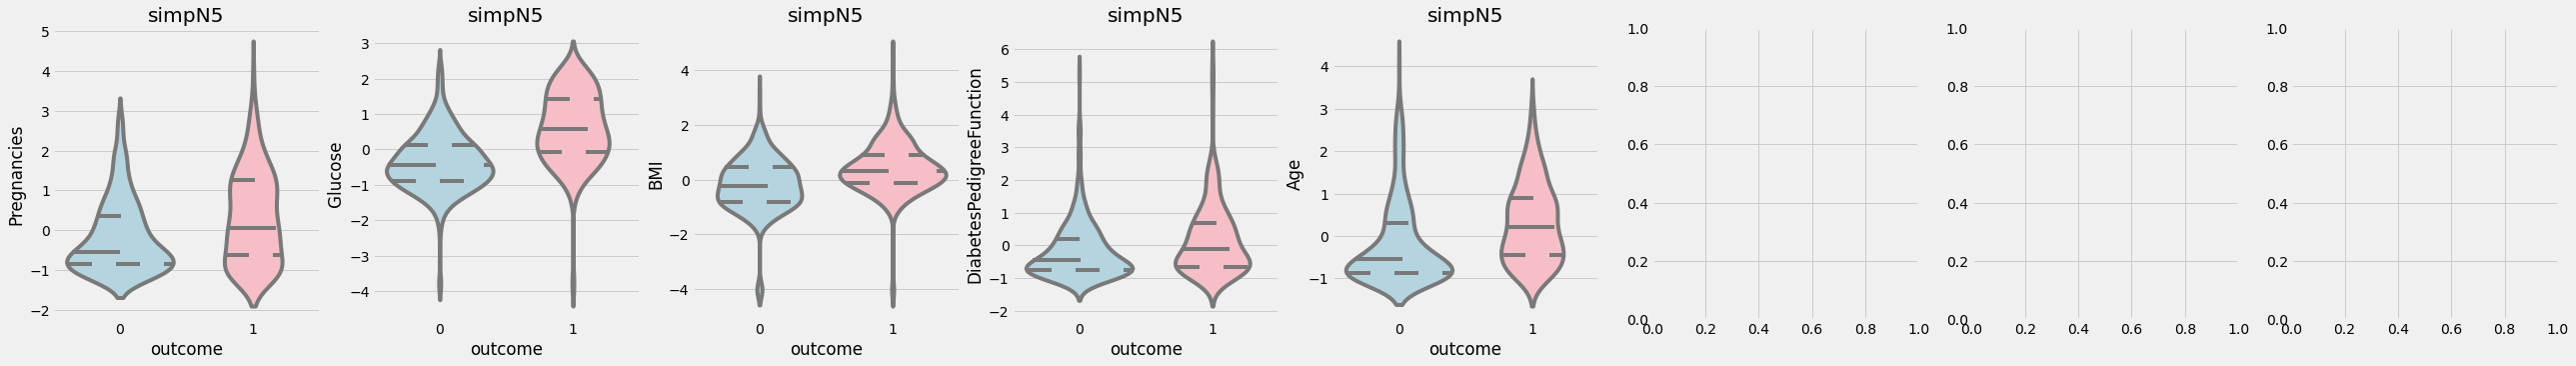

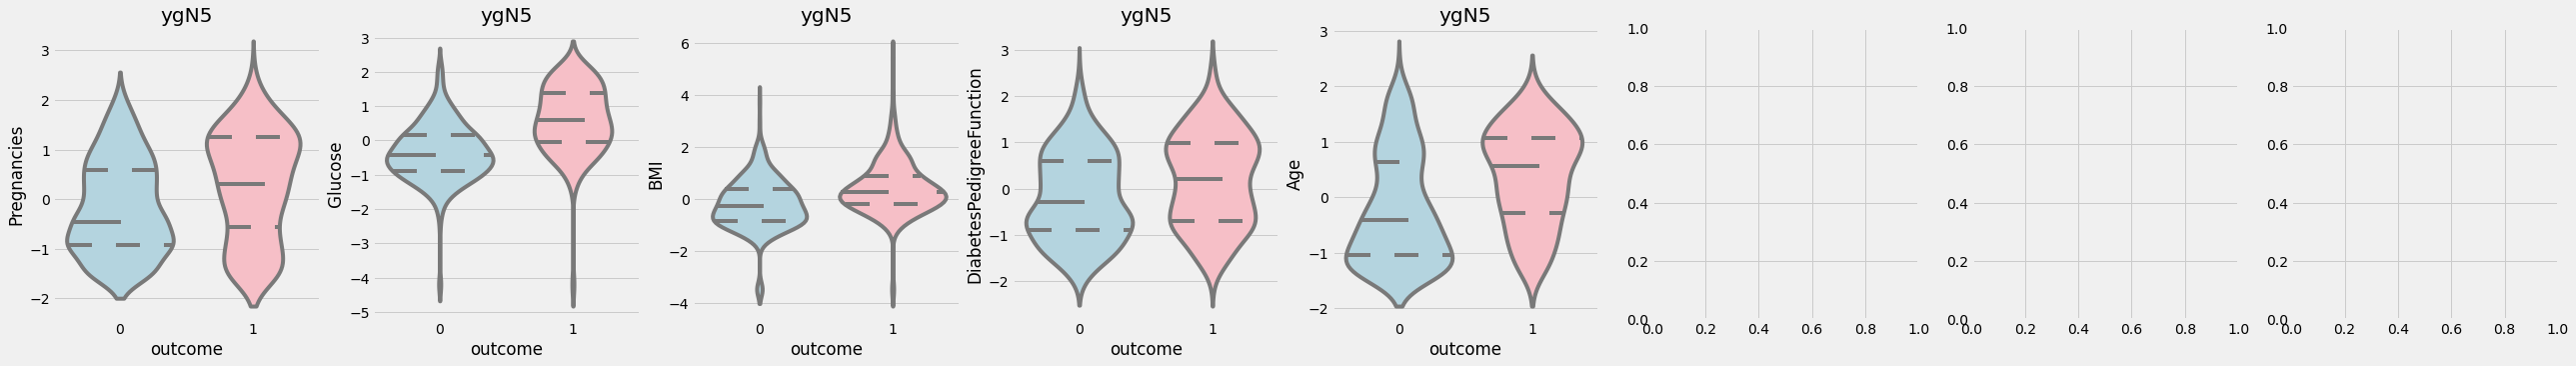

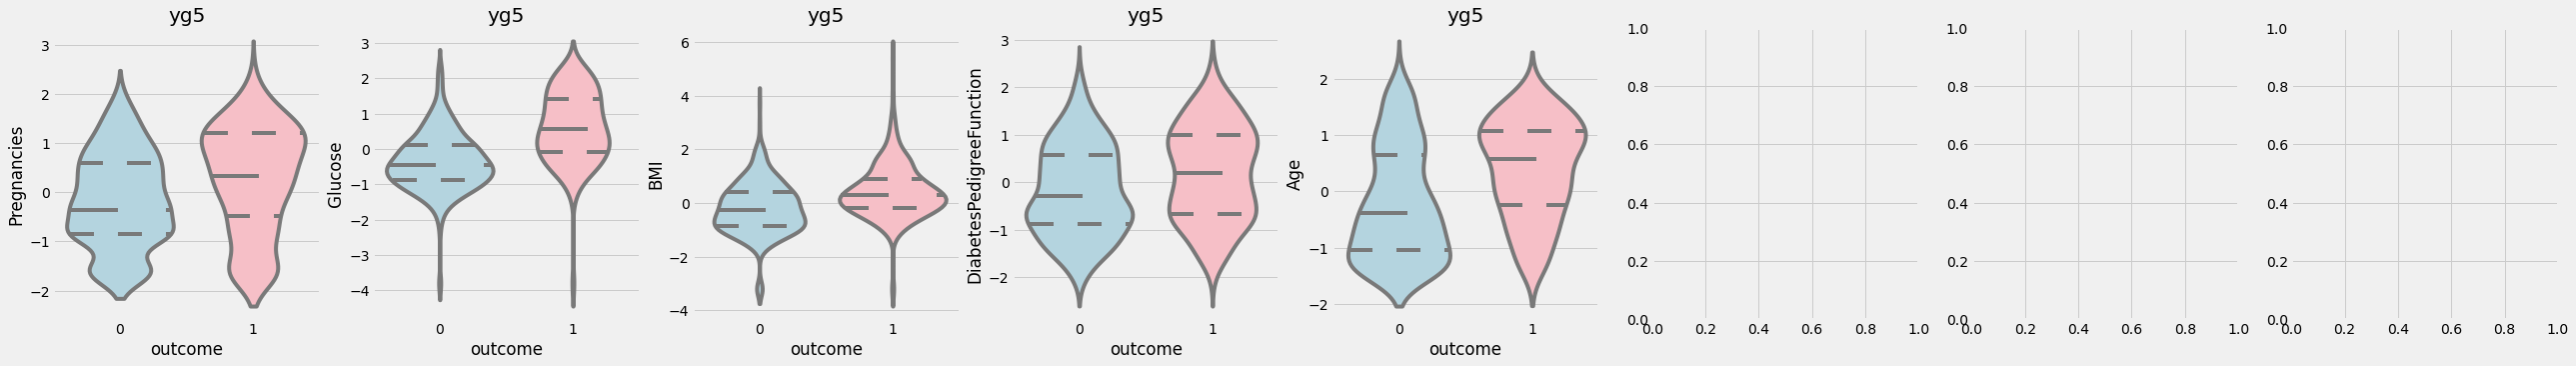

#בדתא המקורי אין הרבה הבדל בין חולה ובריא
##בעיקר יש הבדל בחציון של- גלוקוז, הריון, אינסולין וגיל


#

#גם לאחר נרמול יש אותה יחסיות בין חולה ובריא במאפיינים
#


#ygN
##שזה בעצם נרמול יחד עם 
##yeo-johnson

## יש קצת יותר הבדל בין חולה ובריא במיוחד ב
#הריון, אנסולין וגיל


#yg
#yeo-johnson
#יש הבדל ברור בין חולה ובריא בגיל ובאינסולין

#
#כשמסתכלין על הנתונים של 5=K
#ניתן לראות שכל המאפיינים שיש שם הם מאפיינים עם הבדל ברור פחות או יותר בין חולה ובריא

#בסופו של דבר בויזואליזציה ראינו שהדתא המעובד עם


#yeo-johnson

#עם או בלי נרמול

#K-best<8
(או =5)

#הוא הכי טוב בשביל לסווג בין חולה ובריא